# Implementing Ridge Regression from scratch in python

Ridge Regression 3 Datasets

Ridge Regression Solution: Primary Form

In the Ridge Regression (L2 Regularization) theory derived the solution to be:

$$
\hat{w} = (\lambda I + X'X)^{-1}X'Y
$$
where$$
X = ({x}_1, {x}_2, ... , {x}_t)'
$$

$$
Y = (y_1, y_2, ... , y_T)
$$
This solution minimizes the following cost function

$$
L_{RR}(w) = \sum_{i=1}^{T}(w'{x}_i - y_i)^2 + \lambda ||w||^2
$$

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class Ridge:
    """Linear least squares with L2 regularization."""
    def __init__(self, lam):
        """Initialize a Ridge object.
        Args:
            lam: the regularization factor 
        """
        self._lambda = lam
    def fit(self, x_train, y_train):
        """Generate a fit for the data.
        
        Args:
            x_train: the input values of the training data
            y_train: the output values of the training data
        """
        # stack the data
        X = np.vstack(([x for x in x_train]))
        Y = np.vstack(([y for y in y_train]))
        
        # compute the model coeff
        # theta = inv(xTx + lam*I) * xTy
        XT = np.transpose(X)
        XTX = np.matmul(XT, X) + self._lambda * np.identity(X.shape[1])
        self._coeff_hat = np.matmul(np.matmul(np.linalg.inv(XTX), XT), Y)

<IPython.core.display.Javascript object>


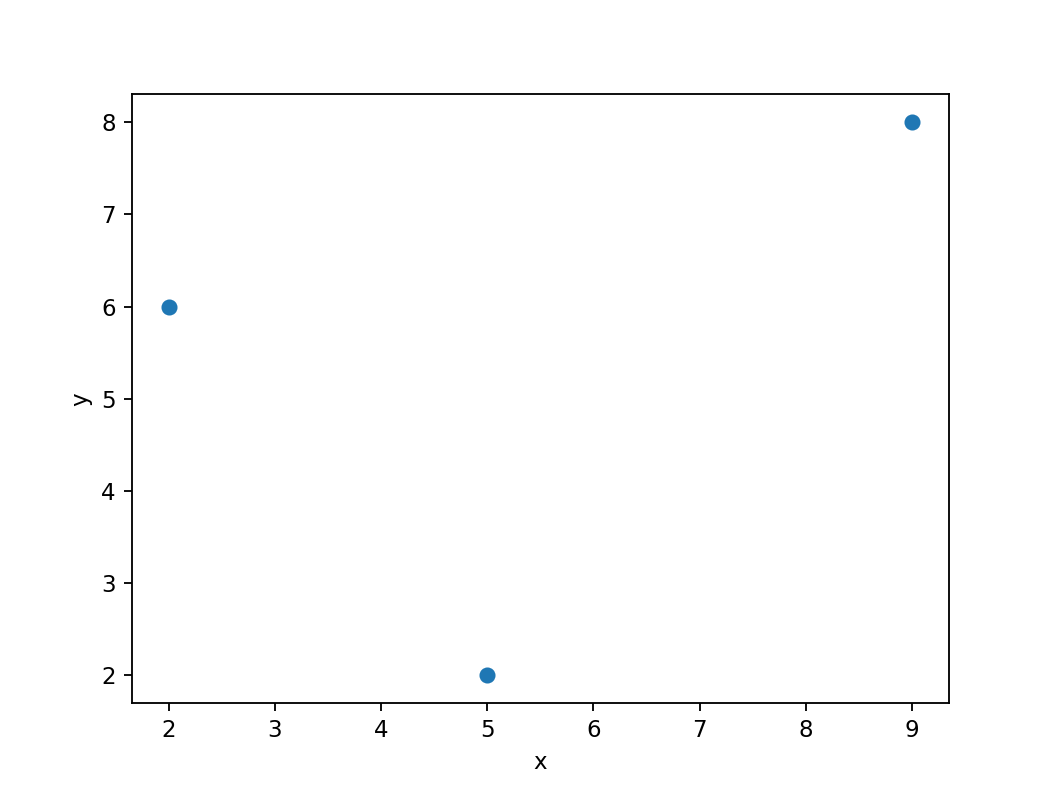

In [3]:
"""Generate fake data"""
x_in = np.array([5, 2, 9])
y_out = np.array([2, 6, 8])

%matplotlib notebook
plt.figure()
plt.scatter(x_in, y_out)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
"""Train using the custom Ridge class"""
x_train, x_test, y_train, y_test = train_test_split(x_in, y_out, test_size=1)


In [5]:
print(x_train, x_test)

[5 2] [9]


In [6]:
lam = 0.1
ridge = Ridge(lam)
ridge.fit(x_train, y_train)

In [8]:
"""Train using Sklearn ridge model"""
from sklearn import linear_model
reg = linear_model.Ridge(alpha=lam)
reg.fit([np.array([x]) for x in x_train], y_train)

Ridge(alpha=0.1)

<IPython.core.display.Javascript object>


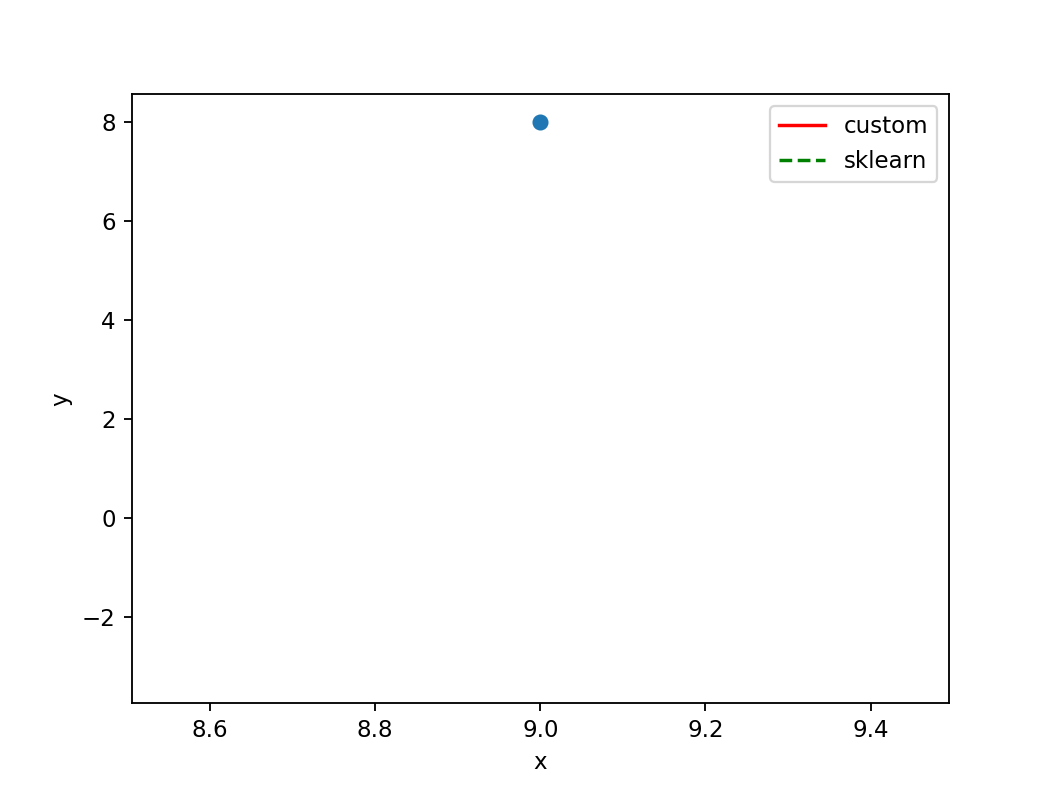

custom: [0.75601375]
sklearn: 8.565217391304348, -1.3043478260869563


In [9]:
"""Plot test data and model predictions"""

plt.figure()
plt.scatter(x_test, y_test)
x_test_sorted = np.sort(x_test)
plt.plot(x_test_sorted, ridge._coeff_hat[0], '-r', label='custom')
plt.plot(x_test_sorted,reg.intercept_ + reg.coef_[0]*x_test_sorted, '--g', label='sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# print the coeff
print(f'custom: {ridge._coeff_hat[0]}')
print(f'sklearn: {reg.intercept_ }, {reg.coef_[0]}')

In [10]:
coeff_store = []
norm_store = []
factors = np.linspace(0.0, 1.0, 10)
for l in factors:
    ridge = Ridge(l)
    ridge.fit(x_train, y_train)

    coeff_store.append(ridge._coeff_hat)
    norm_store.append(np.linalg.norm(ridge._coeff_hat))

<IPython.core.display.Javascript object>


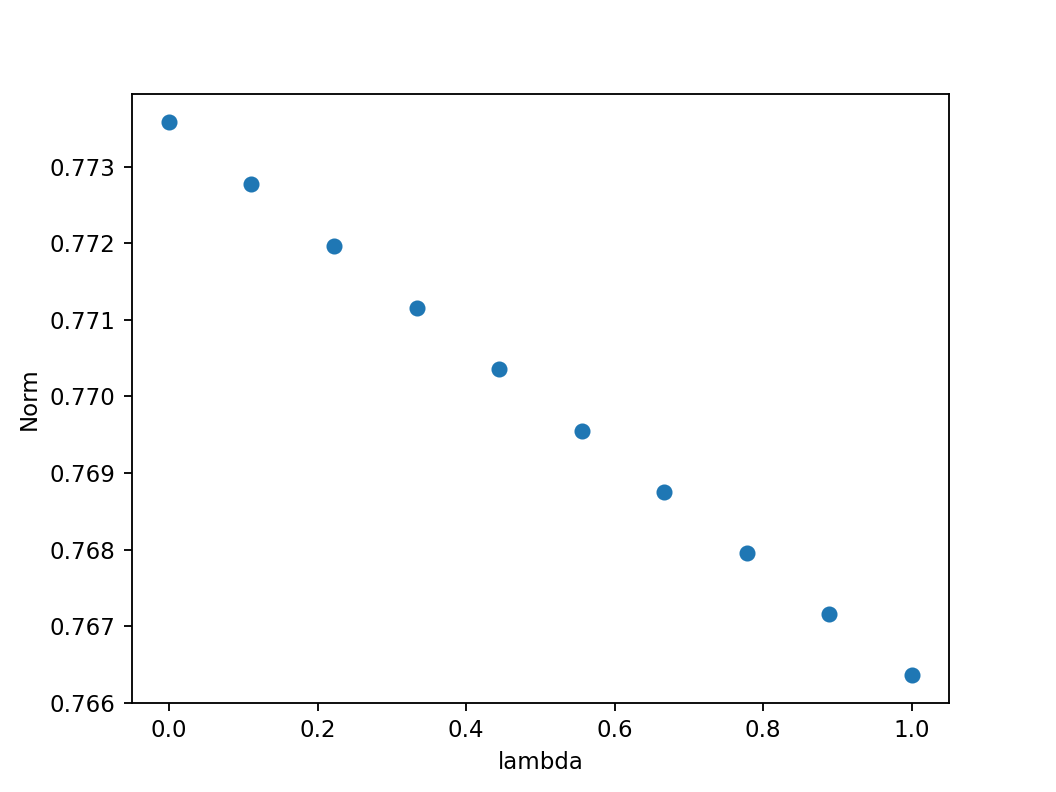

In [112]:
plt.figure()

plt.plot(factors, norm_store, 'o')
plt.xlabel('lambda')
plt.ylabel('Norm')
plt.show()